In [1]:
# General Utility
import pandas as pd
import numpy as np
import copy
import warnings
import pickle
import pdb
import sys
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import interp
%matplotlib inline

# Preprocessing
import missingno as msno
import fancyimpute
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import RobustScaler

# Model Building
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Model Validation
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import log_loss
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import confusion_matrix

C:\Users\mattt\Anaconda3\envs\tf15\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [32]:
# https://classic.fec.gov/finance/disclosure/ftpdet.shtml#a2017_2018

rs = RobustScaler()
cc_raw = pd.read_csv('data/taiwan_cc/default_of_credit_card_clients.csv', index_col='ID')
cc_classes = cc_raw['default_payment_next_month']
cc_df = cc_raw.drop('default_payment_next_month', axis=1)
display(cc_raw.head(5))
display(cc_df.head(5))
display(cc_classes.head(5))
display(cc_raw.shape)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
2,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
3,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
4,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
5,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


ID
1    1
2    1
3    0
4    0
5    0
Name: default_payment_next_month, dtype: int64

(30000, 24)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,-0.631579,0.0,0.0,-1.0,-0.769231,2.0,2.0,-1.0,-1.0,-2.0,...,-0.365126,-0.373848,-0.356074,-0.524214,-0.316775,-0.437424,-0.403524,-0.396930,-0.386374,1.0
1,-0.105263,0.0,0.0,0.0,-0.615385,-1.0,2.0,0.0,0.0,0.0,...,-0.302419,-0.302504,-0.288055,-0.524214,-0.242141,-0.194411,-0.134508,-0.396930,0.128791,1.0
2,-0.263158,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,-0.090477,-0.065180,-0.031747,-0.145282,-0.122150,-0.194411,-0.134508,-0.132310,0.901539,0.0
3,-0.473684,0.0,0.0,-1.0,0.230769,0.0,0.0,0.0,0.0,0.0,...,0.177504,0.224139,0.260230,-0.024963,0.002400,-0.145808,-0.107606,-0.114051,-0.128791,0.0
4,-0.473684,-1.0,0.0,-1.0,1.769231,-1.0,0.0,-1.0,0.0,0.0,...,0.036183,0.021506,0.042968,-0.024963,8.320614,1.992710,2.017621,-0.214607,-0.211475,0.0


## Data Exploration

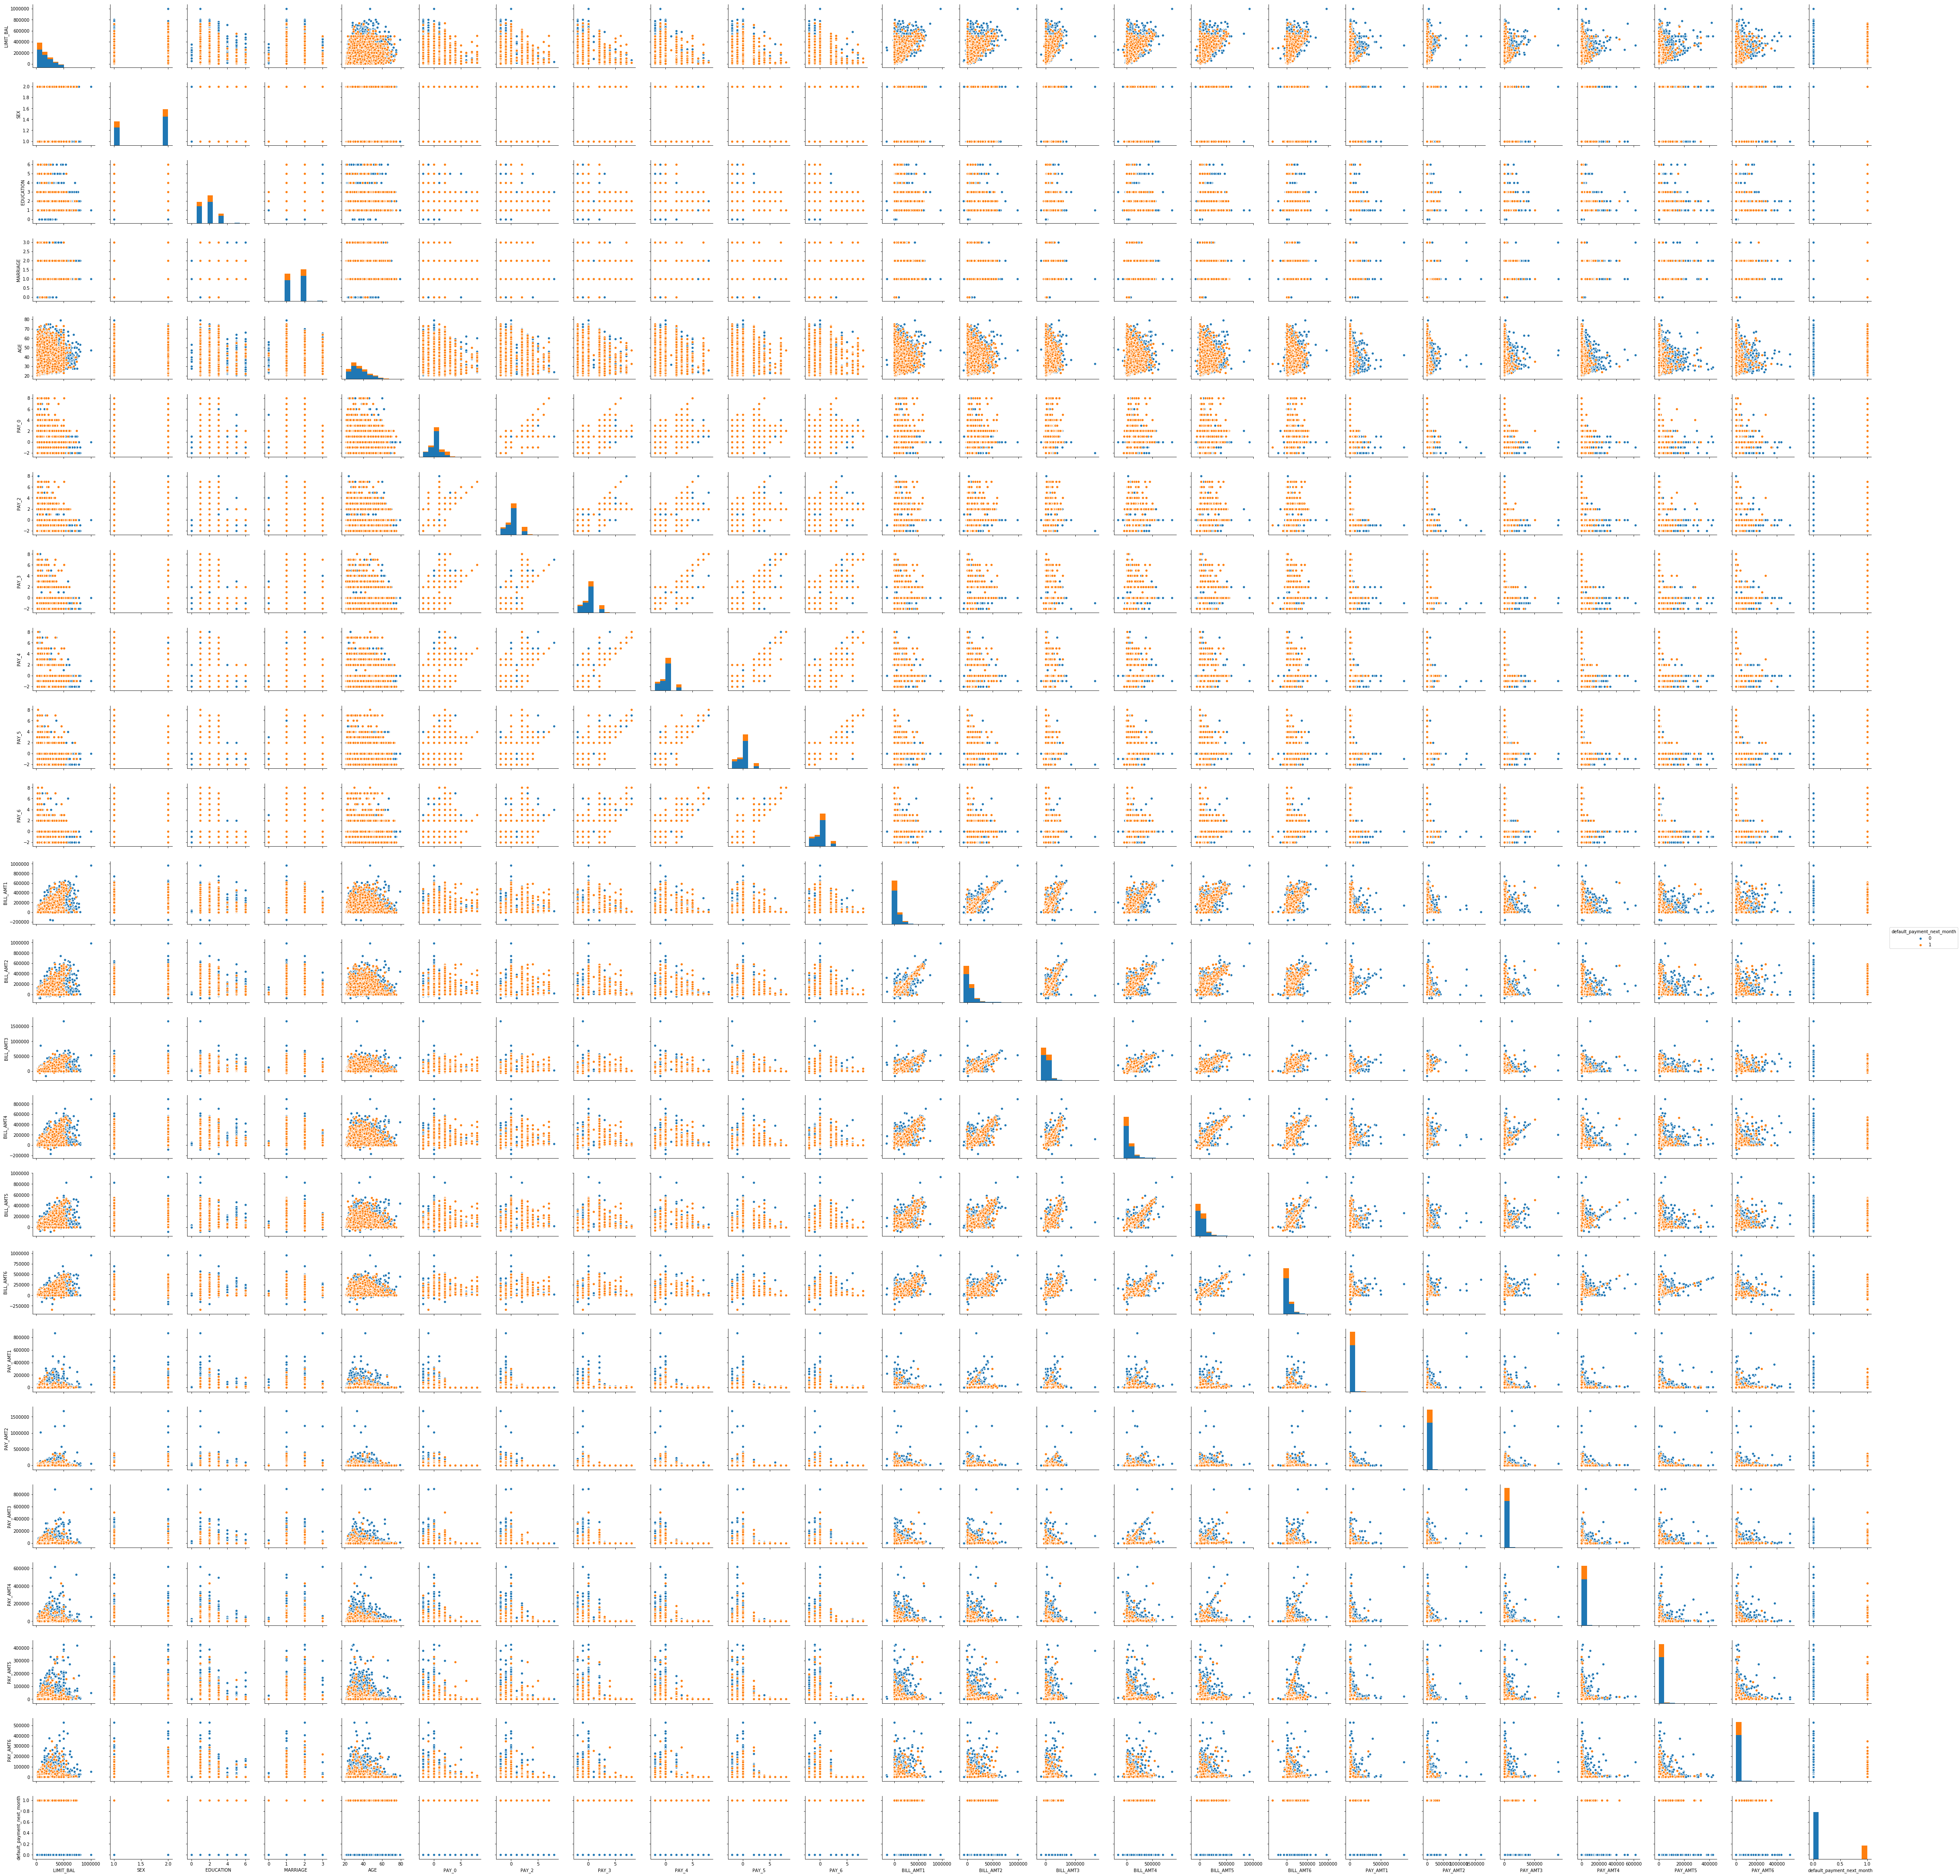

In [6]:
g = sns.pairplot(cc_raw, hue='default_payment_next_month')

In [8]:
fig = g.fig
fig.savefig('FinalProj_pairplot.png')

In [4]:
# with open('data/taiwan_cc/cc_pairplot.pickle', 'xb') as f:
#     pickle.dump(g, f)
    
# with open('data/taiwan_cc/cc_pairplot.pickle', 'rb') as f:
#     g = pickle.load(f)

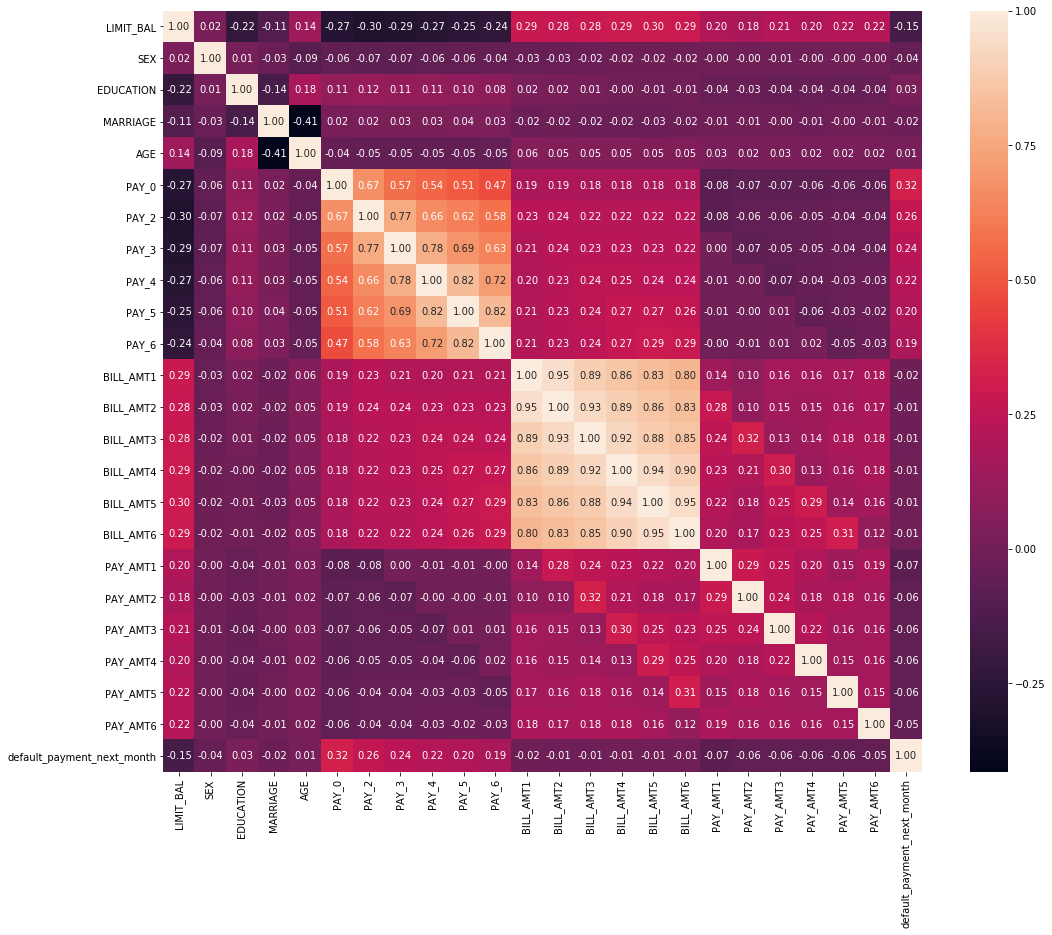

In [5]:
f, ax = plt.subplots(figsize=(17,14))
sns.heatmap(cc_raw.corr(), cbar=True, annot=True, fmt='.2f')

Looking at the correlation matrix above (represented as a heatmap), we see that 'PAY_0' is the feature with the strongest correlation to 'default_payment_next_month', but it only has a $0.32$ Pearson correlation coefficient, and there's a 

In [3]:
# This produces a rather attractive scatterplot 
# df:         a dataframe that contains featureA, featureB, and class_variable
# featureA:   a String representation of one of the columns in DF
# featureB:   a String representation of another of the columns in DF
# class_var:  a String representation of one the class labels column in DF
def feature_compare(df, featureA, featureB, class_var='default_payment_next_month'):
    g = sns.FacetGrid(data=df[[class_var, featureA, featureB]],hue=class_var,
                      hue_order=[0,1], aspect=1, size=5)
    fig = g.fig
    g.map(plt.scatter, featureA, featureB).add_legend()
    fig.suptitle(featureA + ' VS. ' + featureB)

In [4]:
cc_raw.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default_payment_next_month'],
      dtype='object')

In [5]:
cc_raw.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


<function matplotlib.pyplot.tight_layout>

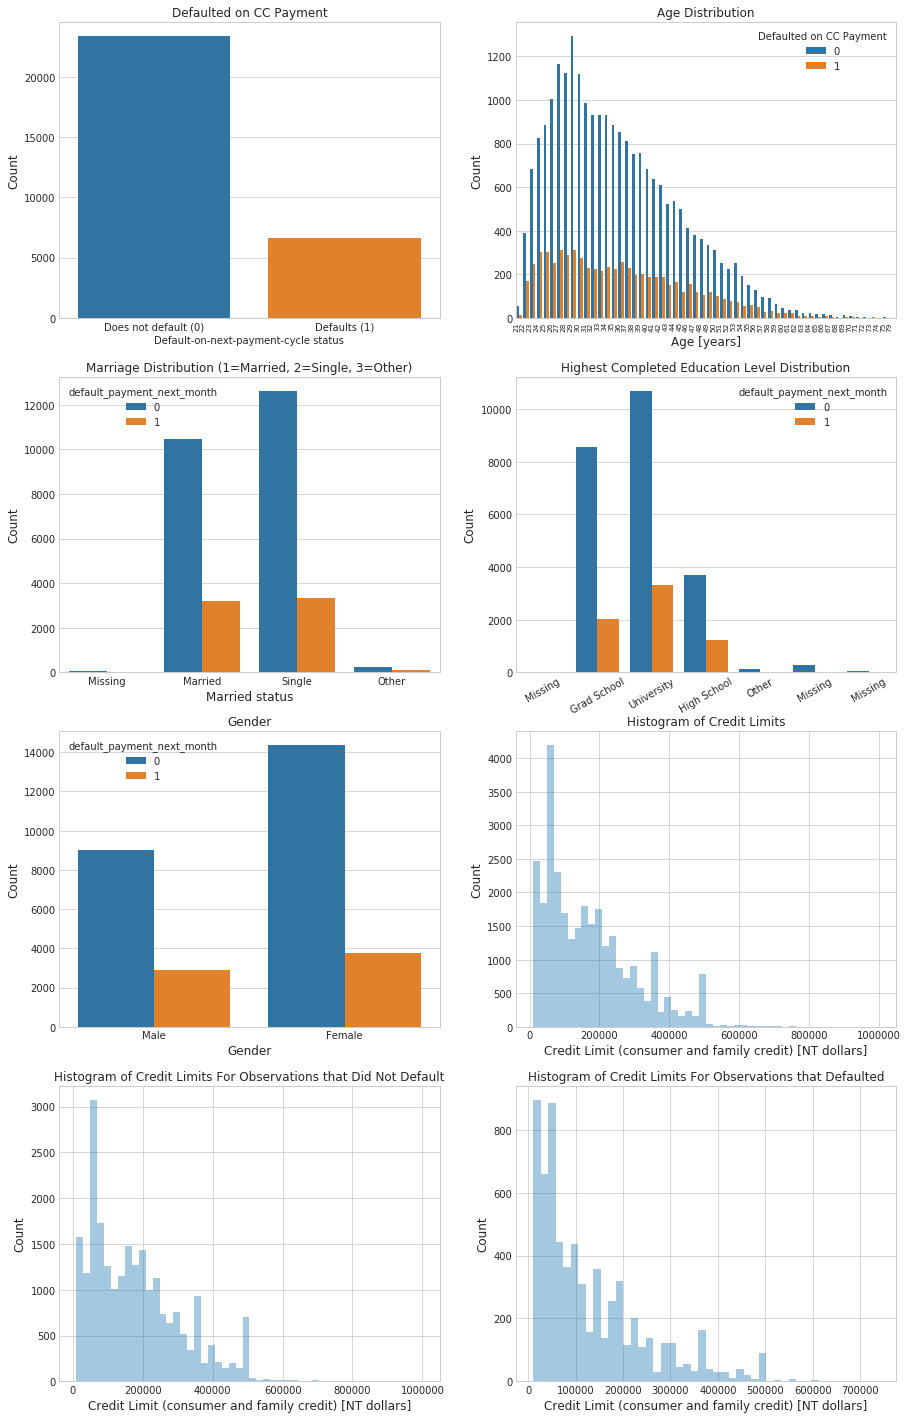

In [6]:
with plt.style.context('seaborn-whitegrid'):
    fig, ax = plt.subplots(nrows=4, ncols=2,figsize=(15,25))
    ax = ax.flatten()
#     fig.suptitle(title)
    sns.countplot(x='default_payment_next_month', data=cc_raw, ax=ax[0])
    ax[0].set_ylabel('Count', fontsize=12)
    ax[0].set_xticklabels(['Does not default (0)', 'Defaults (1)'])
    ax[0].set_xlabel('Default-on-next-payment-cycle status')
    ax[0].set_title('Defaulted on CC Payment')
    sns.countplot(x='AGE', data=cc_raw, hue='default_payment_next_month', ax=ax[1])
    ax[1].set_xlabel('Age [years]', fontsize=12)
    ax[1].set_ylabel('Count', fontsize=12)
    ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90, ha='right', fontsize=7.5)
    ax[1].legend(loc='upper right', title='Defaulted on CC Payment')
    ax[1].set_title('Age Distribution')
    sns.countplot(x='MARRIAGE', data=cc_raw, hue='default_payment_next_month', ax=ax[2])
    ax[2].set_xlabel('Married status', fontsize=12)
    ax[2].set_xticklabels(['Missing', 'Married', 'Single', 'Other'])
    ax[2].set_ylabel('Count', fontsize=12)
    ax[2].set_title('Marriage Distribution (1=Married, 2=Single, 3=Other)')
    sns.countplot(x='EDUCATION', data=cc_raw, hue='default_payment_next_month', ax=ax[3])
    ax[3].set_xlabel('', fontsize=12)
    ax[3].set_xticklabels(['Missing','Grad School','University','High School','Other','Missing','Missing'],
                         rotation=30)
    ax[3].set_ylabel('Count', fontsize=12)
    ax[3].set_title('Highest Completed Education Level Distribution') 
    
    sns.countplot(x='SEX', data=cc_raw, hue='default_payment_next_month', ax=ax[4])
    ax[4].set_xlabel('Gender', fontsize=12)
    ax[4].set_xticklabels(['Male', 'Female'])
    ax[4].set_ylabel('Count', fontsize=12)
    ax[4].set_title('Gender')
    # Not including a number of bins, distplot uses the Freedman-Diaconis rule by default
    sns.distplot(cc_raw['LIMIT_BAL'], norm_hist=False, kde=False, ax=ax[5])
    ax[5].set_xlabel('Credit Limit (consumer and family credit) [NT dollars]', fontsize=12)
    ax[5].set_ylabel('Count', fontsize=12)
    ax[5].set_title('Histogram of Credit Limits')
    sns.distplot(cc_raw['LIMIT_BAL'][cc_raw['default_payment_next_month']==0], 
                 norm_hist=False, kde=False, ax=ax[6])
    ax[6].set_xlabel('Credit Limit (consumer and family credit) [NT dollars]', fontsize=12)
    ax[6].set_ylabel('Count', fontsize=12)
    ax[6].set_title('Histogram of Credit Limits For Observations that Did Not Default')
    sns.distplot(cc_raw['LIMIT_BAL'][cc_raw['default_payment_next_month']==1], 
                 norm_hist=False, kde=False, ax=ax[7])
    ax[7].set_xlabel('Credit Limit (consumer and family credit) [NT dollars]', fontsize=12)
    ax[7].set_ylabel('Count', fontsize=12)
    ax[7].set_title('Histogram of Credit Limits For Observations that Defaulted')
plt.tight_layout

In [7]:
cc_raw.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default_payment_next_month'],
      dtype='object')

### Data Set Feature Descriptions

|--- Feature Name ---|-------- Feature Description --------|------------------  Defined Values  ------------------|
| :--------------: | --------------------: | :---------------- |
| $default\_payment\_next\_month$ | Binary Target Feature indicating a Default on Payment | $0=\text{No Default}$ |
|  |  | $1=\text{Default}$ |
| $LIMIT\_BAL$ | Ammount of available consumer and family credit [NT \$] | $LIMIT\_BAL \geq 0$ |
| $SEX$ | Gender  | $1=\text{Male}$ |
|  |  | $2=\text{Female}$ |
| $EDUCATION$ | Highest completed education level | $1=\text{Grad School}$ |
|  |  | $2=\text{University}$ |
|  |  | $3=\text{High School}$ |
|  |  | $4=\text{Other}$ |
| $MARRIAGE$ | Marital Status | $1=\text{Married}$ |
|  |  | $2=\text{Single}$ |
|  |  | $3=\text{Other}$ |
| $AGE$ | Age | $AGE \geq 0$ |
| $PAY\_x$ | Number of months delinquent 'x' months ago | $-1=\text{no delinquency}$ |
|  |  | $ 1\text{ up to }N=\text{Delinquent 1 to N months}$ |
| $BILL\_AMT\_x$ | Ammount of bill statement 'x' months ago [NT \$] | Any real number (negative values are credits) |
| $PAY\_AMT\_x$ | Amount paid 'x' months ago [NT \$] | $PAY\_AMT\_x \geq 0$ |

### Exploratory Data Analysis

Per the data descriptions, the $MARRIAGE$ feature should only include values 1, 2, and 3, so I will treat the 0s observed in the data as missing values. Per the count below, 54 of 30000 observations (or $0.18\%$) have a missing value for $MARRIAGE$. 

Also, $EDUCATION$ only includes values from $1$ to $4$, but values of $0$, $5$, and $6$ were observed in the data. They will also be treated as missing variables. Per the count below, 345 of 30000 observations (or $1.15\%$) have a missing value for $EDUCATION$. 

As the distribution of target labels is very imbalanced , I'll use SMOTE 

In [39]:
cc_no_NAs = cc_raw
marriage_0s = cc_no_NAs['MARRIAGE'][cc_no_NAs['MARRIAGE'] == 0]
edu_NAs = cc_no_NAs['EDUCATION'][cc_no_NAs['EDUCATION'].isin([0,5,6])]
print('There are {} records in the data set where MARRIAGE == 0'.format(len(marriage_0s)))
print('There are {} records in the data set where EDUCATION != a defined value (ie [1,2,3,4])'
      .format(len(edu_NAs)))
cc_no_NAs.loc[marriage_0s.index, 'MARRIAGE'] = None
cc_no_NAs.loc[edu_NAs.index, 'EDUCATION'] = None
cc_no_NAs.dropna(axis=0, inplace=True)

There are 54 records in the data set where MARRIAGE == 0
There are 345 records in the data set where EDUCATION != a defined value (ie [1,2,3,4])


In [40]:
categories = ['SEX', 'EDUCATION','MARRIAGE','PAY_0', 'PAY_2','PAY_3','PAY_4','PAY_5', 'PAY_6']
cc_cats = pd.get_dummies(cc_no_NAs, columns=categories)
cc_cats.columns

Index(['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default_payment_next_month',
       'SEX_1', 'SEX_2', 'EDUCATION_1.0', 'EDUCATION_2.0', 'EDUCATION_3.0',
       'EDUCATION_4.0', 'MARRIAGE_1.0', 'MARRIAGE_2.0', 'MARRIAGE_3.0',
       'PAY_0_-2', 'PAY_0_-1', 'PAY_0_0', 'PAY_0_1', 'PAY_0_2', 'PAY_0_3',
       'PAY_0_4', 'PAY_0_5', 'PAY_0_6', 'PAY_0_7', 'PAY_0_8', 'PAY_2_-2',
       'PAY_2_-1', 'PAY_2_0', 'PAY_2_1', 'PAY_2_2', 'PAY_2_3', 'PAY_2_4',
       'PAY_2_5', 'PAY_2_6', 'PAY_2_7', 'PAY_2_8', 'PAY_3_-2', 'PAY_3_-1',
       'PAY_3_0', 'PAY_3_1', 'PAY_3_2', 'PAY_3_3', 'PAY_3_4', 'PAY_3_5',
       'PAY_3_6', 'PAY_3_7', 'PAY_3_8', 'PAY_4_-2', 'PAY_4_-1', 'PAY_4_0',
       'PAY_4_1', 'PAY_4_2', 'PAY_4_3', 'PAY_4_4', 'PAY_4_5', 'PAY_4_6',
       'PAY_4_7', 'PAY_4_8', 'PAY_5_-2', 'PAY_5_-1', 'PAY_5_0', 'PAY_5_2',
       'PAY_5_3', 'PAY_5_4', 'PAY_5_5

In [6]:
missing_data = cc_cats.columns[cc_cats.isnull().any()].tolist()
# msno.matrix(cc_cats[missing_data])
cc_cats_index = cc_cats.index
cc_cats_cols = cc_cats.columns
missing_data
# msno.matrix??

[]

In [41]:
# cc_df_prepd = pd.DataFrame(data=cc_cats, columns=cc_cats, index=cc_raw_index)
cc_classes = cc_cats['default_payment_next_month']
cc_cats.drop('default_payment_next_month', axis=1, inplace=True)
display(cc_classes.head(5))
display(cc_cats.head(5))

ID
1    1
2    1
3    0
4    0
5    0
Name: default_payment_next_month, dtype: int64

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,24,3913,3102,689,0,0,0,0,689,...,1,0,0,0,0,0,0,0,0,0
2,120000,26,2682,1725,2682,3272,3455,3261,0,1000,...,0,0,0,1,0,0,0,0,0,0
3,90000,34,29239,14027,13559,14331,14948,15549,1518,1500,...,0,0,1,0,0,0,0,0,0,0
4,50000,37,46990,48233,49291,28314,28959,29547,2000,2019,...,0,0,1,0,0,0,0,0,0,0
5,50000,57,8617,5670,35835,20940,19146,19131,2000,36681,...,0,0,1,0,0,0,0,0,0,0


In addition to the issue of missing values (which we just handled through imputation), the class labels are severely imbalanced and we'll want to do something to balance them, however, we don't want to apply SMOTE or ADASYN across the entire dataset as it will imprint information from training sets onto testing sets, which destroys the perfect partition between training and testing sets, so we'll have to build it into a loop. Also, we need to preserve the categorical natures of features like $MARRIAGE$, $SEX$, and $EDUCATION$, so that they're not treated as continuous variables when we balance classes.

In [8]:
sns.choose_colorbrewer_palette('sequential', as_cmap=True)

interactive(children=(Dropdown(description='name', options=('Greys', 'Reds', 'Greens', 'Blues', 'Oranges', 'Purples', 'BuGn', 'BuPu', 'GnBu', 'OrRd', 'PuBu', 'PuRd', 'RdPu', 'YlGn', 'PuBuGn', 'YlGnBu', 'YlOrBr', 'YlOrRd'), value='Greys'), IntSlider(value=10, description='n', max=18, min=2), FloatSlider(value=1.0, description='desat', max=1.0), Dropdown(description='variant', options=('regular', 'reverse', 'dark'), value='regular'), Output()), _dom_classes=('widget-interact',))

In [58]:
g_cmap = sns.light_palette('seagreen', n_colors=10, as_cmap=True)
def confusion_mat_plotter(cfn_matrix, class_labels, title, ax, cmap=g_cmap):
#     print(cfn_matrix)
    sns.heatmap(cfn_matrix.T, square=True, annot=True, fmt='d', cbar=False, 
            xticklabels=class_labels, yticklabels=class_labels, ax=ax, cmap=g_cmap)
    ax.set_xlabel('True Class')
    ax.set_ylabel('Predicted Class')
    ax.set_title('Confusion Matrix ' + title)

In [11]:
from scipy import interp

# This executes a simple fit-predict-evaluate routine with a single data split.
# classifier:   a classifier model that conforms to sklearns regular classifier interface
# data/class_train/test: array-like containers holding corresponding data and class labels
def clf_evaluation(classifier, data_train_, data_test_, class_train_, class_test_, pred_, thresh=0.5):
    classifier.fit(data_train_, class_train_)
    if pred_ == 'predict_proba':
        print('predict_proba!')
        clf_probas = classifier.predict_proba(data_test_)
        clf_pred = (clf_probas > thresh).astype(int)
        print((clf_probas > thresh))
    elif pred_ == 'predict':
        clf_pred = classifier.predict(data_test_)
    print('clf_pred.flatten(): ' + str(clf_pred.flatten()))
    print('class_test_: ' + str(class_test_))
#     clf_pred = classifier.predict(data_test_)
    clf_acc = accuracy_score(class_test_, (clf_pred > thresh).astype(int).flatten())
    clf_rec = recall_score(class_test_, clf_pred)
    clf_pre = precision_score(class_test_, clf_pred)
    clf_cfn = confusion_matrix(class_test_, clf_pred)
#     pdb.set_trace()
    return clf_acc, clf_rec, clf_pre, clf_cfn, clf_pred

# TODO: build a cumulative ROC  curve
def manual_crossvalidator(clf_, df_, classes_, predictor, printIt=True, n_trials=30, seed=1234, thresh=0.5):
    rng = np.random.RandomState(seed)
    random_seeds = rng.randint(low=0, high=99999, size=n_trials)
    sm = SMOTE(kind='regular')
    recall_ = []; precision_ = []; accuracy_ = []; cfn_mats_ = []
    preds_ = []; fprs_ = []; tprs_ = []
    for i in range(n_trials):
        d_train, d_test, class_train, class_test = \
                train_test_split(df_, classes_, random_state=random_seeds[i])
        d_train_sm, class_train_sm = sm.fit_sample(d_train, class_train)
        d_test_sm, class_test_sm = sm.fit_sample(d_test, class_test)
        rec, pre, acc, cfn, pred = clf_evaluation(clf_, d_train_sm, d_test_sm,\
                                            class_train_sm, class_test_sm, predictor)
        recall_.append(rec); precision_.append(pre); accuracy_.append(acc)
        np.append(cfn_mats_, cfn)
        np.append(preds_, pred)
        print('class_test_sm: '+ str(class_test_sm))
        print('class_test_sm.shape: '+ str(class_test_sm.shape))
        print('pred: ' + str(pred))
        print('preds_: '+ str(preds_))
#         print('preds_.shape: '+ str(preds_.shape))
        fpr, tpr, _ = roc_curve(class_test_sm, preds_[:, 1])
        fprs.append(fpr); tprs.append(tpr)
    with plt.style.context('seaborn-whitegrid'):
        fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(10,5))
        roc_builder(fprs, tprs, ax[1])
    return recall_, precision_, accuracy_, cfn_mats_

# TODO: BUILD THIS FROM THE ROC_exploration FILE
# Adapted from https://goo.gl/UF1LJ2
def roc_builder(fprs_, tprs_, ax_):
    aucs_ = []
    tpr_spread_ = []
    mean_fpr = np.linspace(0, 1, 100)
    i=0
    for fpr_, tpr_ in zip(fprs_, tprs_):
        tpr_spread_.append(interp())
        tprs[-1][0] = 0.0
        roc_auc = auc(fpr_, tpr_)
        aucs.append(roc_auc)
        label_ = 'ROC fold {:0.0d} (AUC = {:0.3f})'.format(i, roc_auc)
        i += 1
        ax_.plot(fpr_, tpr_, lw=0.5, alpha=0.3, label=label_)
    ax.plot([0,1],[0,1], linestyle='--', lw=1, color=-'r', label='Random Clf', alpha=0.8)
        
    

In [10]:
from imblearn.over_sampling import SMOTE, ADASYN
# sm = SMOTE(kind='regular')
# c, r = train10k_labels.shape
sm = SMOTE(kind='regular')
cc_data_cols = cc_cats.columns
class_col = cc_classes.name
cc_train, cc_test, class_train, class_test = train_test_split(cc_cats,
                                                              cc_classes,
                                                              test_size=0.34,
                                                              random_state=123)
cc_train_sm, class_train_sm = sm.fit_sample(cc_train, class_train)
cc_test_sm, class_test_sm = sm.fit_sample(cc_test, class_test)
cc_train_sm = pd.DataFrame(cc_train_sm, columns=cc_data_cols)
class_train_sm = pd.Series(class_train_sm, name=class_col)
cc_test_sm = pd.DataFrame(cc_test_sm, columns=cc_data_cols)
class_test_sm = pd.DataFrame(class_test_sm, columns=[class_col])
# cc_cats_sm, cc_classes_sm = sm.fit_sample(cc_cats, cc_classes)
# cc_cats_sm = pd.DataFrame(cc_cats_sm, columns=cc_data_cols)
# cc_classes_sm = pd.Series(cc_classes_sm, name=class_col)

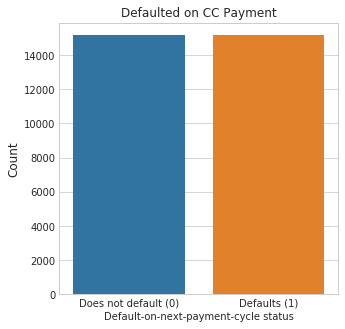

In [11]:
data_ = cc_train_sm
data_['default_payment_next_month'] = class_train_sm
with plt.style.context('seaborn-whitegrid'):
    fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(5,5))
    sns.countplot(x='default_payment_next_month', data=data_, ax=ax)
    ax.set_ylabel('Count', fontsize=12)
    ax.set_xticklabels(['Does not default (0)', 'Defaults (1)'])
    ax.set_xlabel('Default-on-next-payment-cycle status')
    ax.set_title('Defaulted on CC Payment')

In [12]:
logit_param = [
    {'penalty': ['l2'],
     'solver': ['sag', 'lbfgs', 'newton-cg'],
     'C': [0.01, 0.1, 1, 10, 35, 50],
     'max_iter': [100]
    },
    {'penalty': ['l1'],
     'solver': ['saga', 'liblinear'],
     'C': [0.01, 0.1, 1, 10, 35, 50],
     'max_iter': [100]
    }
]
logit_clf = LogisticRegression()

In [20]:
from sklearn.metrics import log_loss
logit_clf_grid = GridSearchCV(logit_clf, logit_param, verbose=9, cv=3,
                              n_jobs=-1, scoring='roc_auc')

%time logit_clf_grid.fit(cc_train_sm, class_train_sm)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   28.4s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  86 out of  90 | elapsed:  2.3min remaining:    6.3s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  2.4min finished
C:\Users\mattt\Anaconda3\envs\tf15\lib\site-packages\scipy\optimize\linesearch.py:461: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\mattt\Anaconda3\envs\tf15\lib\site-packages\scipy\optimize\linesearch.py:312: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


Wall time: 2min 29s


C:\Users\mattt\Anaconda3\envs\tf15\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


GridSearchCV(cv=3, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'C': [0.01, 0.1, 1, 10, 35, 50], 'penalty': ['l2'], 'solver': ['sag', 'lbfgs', 'newton-cg'], 'max_iter': [100]}, {'C': [0.01, 0.1, 1, 10, 35, 50], 'penalty': ['l1'], 'solver': ['saga', 'liblinear'], 'max_iter': [100]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=9)

In [13]:
featA_mask = logit_clf_grid.cv_results_['param_solver'] == 'sag'
np.array(logit_clf_grid.cv_results_['params'])[featA_mask]

NameError: name 'logit_clf_grid' is not defined

In [62]:
def print_logit_stats(grid_clf, wantPrint=True):
    print('Param values that produces the most accurate model: {}'
          .format(grid_clf.best_params_))
    print('Score of the most accurate model: {:.6f} \n'.format(grid_clf.best_score_))
    means = grid_clf.cv_results_['mean_test_score']
    stdevs = grid_clf.cv_results_['std_test_score']
    params = grid_clf.cv_results_['params']
    c_list = grid_clf.cv_results_['param_C']
    solver_list = grid_clf.cv_results_['param_solver']
    penalty_list = grid_clf.cv_results_['param_penalty']
    dict_ = {
        'mean score': means,
        'mean stdev': stdevs,
        'C': c_list,
        'solver': solver_list,
        'penalty': penalty_list
    }
    if wantPrint:
        print('   --- Mean accuracy (+/- standard deviation) for different C values ---')
    for mean, stdev, c, sol, pen in zip(means, stdevs, c_list, solver_list, penalty_list):
        if wantPrint:
            print('{:0.3f} (+/- {:0.3f}) for the model with C = {:>6.3f}, solver = \
{:10s}, and penalty = {}.'.format(mean, stdev, c, sol, pen))
    return pd.DataFrame(dict_)   

# def param_heat_mapper(ax_, df_, ind_col, val_col, col_col, base_clfname):
#     logit_piv = df_.pivot(index=ind_col, values=val_col, columns=col_col)
#     title_ = base_clfname + ' Accuracy by parameters ' + ind_col + ' and ' + col_col
#     with plt.style.context('seaborn-whitegrid'):
# #         fig, ax = plt.subplots(nrows=1, sharex=False, figsize=(9,7))
#         sns.heatmap(logit_piv, linewidths=0.5, annot=True, fmt='0.4f', ax=ax_)
#         ax_.set_title(title_, fontsize=16)
#         ax_.set_xlabel('Param: ' + col_col, fontsize=16)
#         ax_.set_ylabel('Param: ' + ind_col, fontsize=16)
        
def param_heat_mapper(ax_, df_, ind_col, val_col, col_col, base_clfname, cmap=g_cmap):
    logit_piv = df_.pivot(index=ind_col, values=val_col, columns=col_col)
    title_ = base_clfname + ' Accuracy by parameters ' + ind_col + ' and ' + col_col
    with plt.style.context('seaborn-whitegrid'):
#         fig, ax = plt.subplots(nrows=1, sharex=False, figsize=(9,7))
        sns.heatmap(logit_piv, linewidths=0.5, annot=True, fmt='0.4f', ax=ax_, cmap=g_cmap)
        ax_.set_title(title_, fontsize=16)
        ax_.set_xlabel('Param: ' + col_col, fontsize=16)
        ax_.set_ylabel('Param: ' + ind_col, fontsize=16)
        
def print_stats(grid_clf, wantPrint=True):
    print('Param values that produces the most accurate model: {}'
          .format(grid_clf.best_params_))
    print('Score of the most accurate model: {:.6f} \n'.format(grid_clf.best_score_))
    means = grid_clf.cv_results_['mean_test_score']
    stdevs = grid_clf.cv_results_['std_test_score']
    params = grid_clf.cv_results_['params']
    if wantPrint:
        print('   --- Mean accuracy (+/- standard deviation) for different parameters ---')
    for mean, stdev, param in zip(means, stdevs, params):
        if wantPrint:
            print('{:0.3f} (+/- {:0.3f}) for the model with params {}'
                  .format(mean, stdev, param))

In [17]:
logit_df = print_logit_stats(logit_clf_grid)
logit_df.head(5)

NameError: name 'logit_clf_grid' is not defined

NameError: name 'logit_df' is not defined

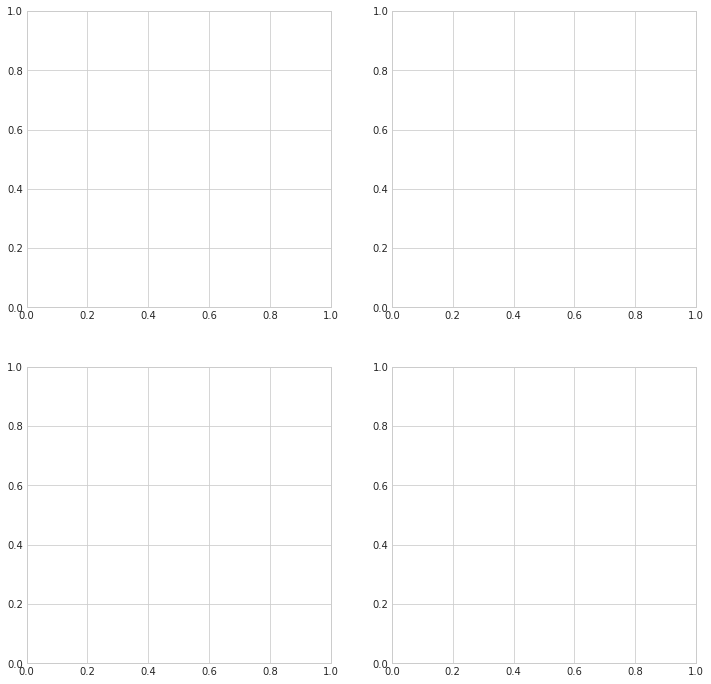

In [14]:
with plt.style.context('seaborn-whitegrid'):
    fig, ax = plt.subplots(nrows=2, ncols=2, sharex=False, figsize=(12,12))
    ax = ax.flatten()
    param_heat_mapper(ax[0], logit_df, 'C', 'mean score', 'solver',
                      'Logistic Regression', cmap=g_cmap)
    param_heat_mapper(ax[1], logit_df[logit_df['solver'] == 'liblinear'], 'C',
                  'mean score', 'penalty', 'Logistic Regression', cmap=g_cmap)
    param_heat_mapper(ax[2], logit_df[logit_df['solver'] == 'newton-cg'], 'C',
                  'mean score', 'penalty', 'Logistic Regression', cmap=g_cmap)

In [15]:
best_logit_clf = LogisticRegression(solver='liblinear', penalty='l1',
                                   C=1, max_iter=100)

[[7188 1392]
 [3200 5380]]


(0.0, 1.0)

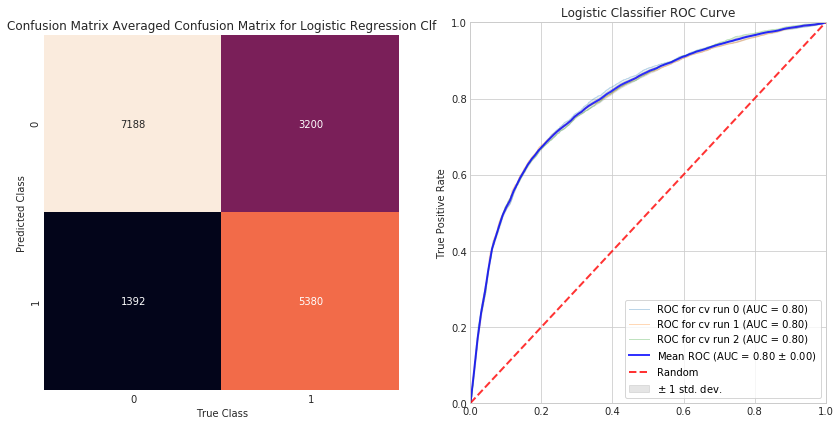

In [53]:
# cc_train_sm, class_train_sm, cc_test_sm, class_test_sm
tprs = []
aucs = []
cfns = np.zeros((2,2), dtype=int)
cv_runs = 3
mean_fpr = np.linspace(0, 1, 100)
rng = np.random.RandomState(123)
random_seeds = rng.randint(low=0, high=99999, size=cv_runs)
debugger = False

with plt.style.context('seaborn-whitegrid'):
    fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(14,7))

for i in range(cv_runs):
    d_train, d_test, cls_train, cls_test = train_test_split(cc_cats, cc_classes, random_state=random_seeds[i])
    d_train_sm, cls_train_sm = sm.fit_sample(d_train, cls_train)
    d_test_sm, cls_test_sm = sm.fit_sample(d_test, cls_test)
    probas_ = best_logit_clf.fit(d_train_sm, cls_train_sm).predict_proba(d_test_sm)
    preds_ = best_logit_clf.predict(d_test_sm)
    cfn_ = confusion_matrix(cls_test_sm, preds_, [0,1])
    cfns = cfns + cfn_
    if debugger:
        print('d_train.shape: ' + str(d_train.shape))
        print('cls_train.shape: ' + str(cls_train.shape))
        print('d_test.shape: ' + str(d_test.shape))
        print('cls_test.shape: ' + str(cls_test.shape))
        print('d_train_sm.shape: ' + str(d_train_sm.shape))
        print('cls_train_sm.shape: ' + str(cls_train_sm.shape))
        print('d_test_sm.shape: ' + str(d_test_sm.shape))
        print('cls_test_sm.shape: ' + str(cls_test_sm.shape))
        print('cc_test_sm.shape: ' + str(cc_test_sm.shape))
        print('probas_.shape: ' + str(probas_.shape))
        print('probas_[:, 1].shape: ' + str(probas_[:, 1].shape))
    fpr, tpr, thresholds = roc_curve(cls_test_sm, probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0 
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    l_label = 'ROC for cv run {:d} (AUC = {:0.2f})'.format(i, roc_auc)
    ax[1].plot(fpr, tpr, lw=1, alpha=0.3, label=l_label)

cfns = cfns//i
confusion_mat_plotter(cfns, [0,1], 'Averaged Confusion Matrix for Logistic Regression Clf', ax[0])
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax[1].plot(mean_fpr, mean_tpr, color='b',
          label='Mean ROC (AUC = {:0.2f} $\pm$ {:0.2f})'.format(mean_auc, std_auc),
          lw=2, alpha=0.8)
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', 
                 alpha=.2, label='$\pm$ 1 std. dev.')

ax[1].plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', 
               label='Random', alpha=.8)
ax[1].legend(loc="lower right")
ax[1].set_title('Logistic Classifier ROC Curve')
ax[1].set_ylabel('True Positive Rate')
ax[1].set_xlim([0.0,1.0])
ax[1].set_ylim([0.0,1.0])

In [51]:
probas_.shape

NameError: name 'probas_' is not defined

In [52]:
# def evaluator(clf_, data_, labels_,  clf_type, cv_runs_=30,
#               scale_data=False, seed=1234, debugger = False):
def evaluator(clf_, data_, labels_,  clf_type, cv_runs_=30,
              seed=1234, debugger = False):
    tprs = []
    aucs = []
    cfns = np.zeros((2,2), dtype=int)
    mean_fpr = np.linspace(0, 1, 100)
    rng = np.random.RandomState(seed)
    random_seeds = rng.randint(low=0, high=99999, size=cv_runs_)
#     robust_scaler = RobustScaler()
    with plt.style.context('seaborn-whitegrid'):
        fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(14,7))
    
    for i in range(cv_runs_):
        d_train, d_test, cls_train, cls_test = \
                    train_test_split(data_, labels_, random_state=random_seeds[i])
        d_train_sm, cls_train_sm = sm.fit_sample(d_train, cls_train)
        d_test_sm, cls_test_sm = sm.fit_sample(d_test, cls_test)
#         if scale_data:
#             d_train_sm = robust_scaler.fit_transform(d_train_sm)
#             d_test_sm = robust_scaler.transform(d_test_sm)
        probas_ = clf_.fit(d_train_sm, cls_train_sm).predict_proba(d_test_sm)
        preds_ = clf_.predict(d_test_sm)
        cfn_ = confusion_matrix(cls_test_sm, preds_, [0,1])
        cfns = cfns + cfn_
        if debugger:
            print('d_train.shape: ' + str(d_train.shape))
            print('cls_train.shape: ' + str(cls_train.shape))
            print('d_test.shape: ' + str(d_test.shape))
            print('cls_test.shape: ' + str(cls_test.shape))
            print('d_train_sm.shape: ' + str(d_train_sm.shape))
            print('cls_train_sm.shape: ' + str(cls_train_sm.shape))
            print('d_test_sm.shape: ' + str(d_test_sm.shape))
            print('cls_test_sm.shape: ' + str(cls_test_sm.shape))
            print('cc_test_sm.shape: ' + str(cc_test_sm.shape))
            print('probas_.shape: ' + str(probas_.shape))
            print('probas_[:, 1].shape: ' + str(probas_[:, 1].shape))
        fpr, tpr, thresholds = roc_curve(cls_test_sm, probas_[:, 1])
        tprs.append(interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0 
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
#         l_label = 'ROC for cv run {:d} (AUC = {:0.2f})'.format(i, roc_auc)
        ax[1].plot(fpr, tpr, lw=1, alpha=0.3)
    
    # Plotting the average Confusion Matrix
    cfns = cfns//i
    cfn_title = 'Averaged Confusion Matrix for {} Clf'.format(clf_type)
    confusion_mat_plotter(cfns, [0,1], cfn_title, ax[0])
    
    # Plotting the error bars on the ROC curve
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax[1].plot(mean_fpr, mean_tpr, color='b',
            label='Mean ROC (AUC = {:0.2f} $\pm$ {:0.2f})'
               .format(mean_auc, std_auc), lw=2, alpha=0.8)
    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax[1].fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', 
                     alpha=.2, label='$\pm$ 1 std. dev.')
    ax[1].plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', 
               label='Random', alpha=.8)
    ax[1].legend(loc='best', fancybox=True, framealpha=0.4)
#     ax[1].legend(loc=(1.03, 0), fancybox=True, framealpha=0.4)
    ax[1].set_title('{} ROC Curve'.format(clf_type))
    ax[1].set_ylabel('True Positive Rate')
    ax[1].set_xlim([0.0,1.0])
    ax[1].set_ylim([0.0,1.0])

In [53]:
%xmode Verbose

Exception reporting mode: Verbose


In [54]:
best_logit_clf = LogisticRegression(solver='liblinear', penalty='l1',
                                   C=1, max_iter=100)

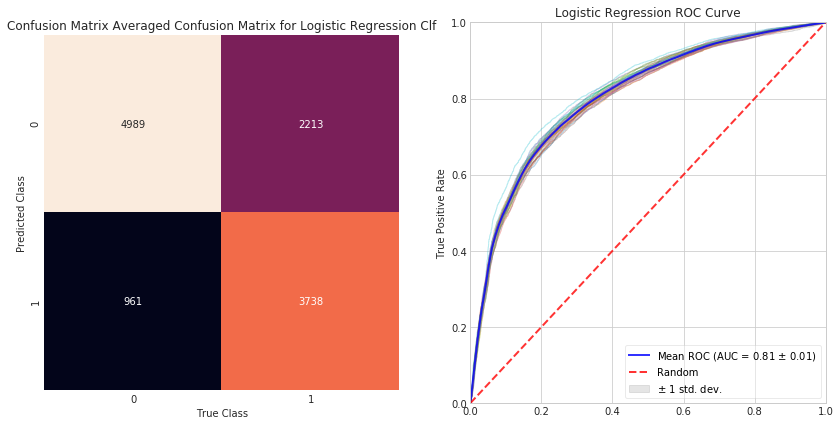

In [55]:
evaluator(best_logit_clf, cc_cats, cc_classes, 'Logistic Regression', 30)

## KNN

Now I'll try build to build a reasonably well tuned K-Nearest Neighbors classifier to see how it performs on this data. As KNN uses a distance metric, we'll want to scale the data, but I'll establish a baseline with the unscaled SMOTE-balanced data.

In [110]:
knn_param = [
                {'n_neighbors': [3,5,10,20],
                 'p': [1,2,2.5,3]
                }
            ]
knn_clf = KNeighborsClassifier()

In [111]:
knn_clf_grid = GridSearchCV(knn_clf, knn_param, verbose=9, cv=3, n_jobs=-1)

%time knn_clf_grid.fit(cc_train_sm, class_train_sm)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   24.1s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  39 out of  48 | elapsed:  3.4min remaining:   46.8s
[Parallel(n_jobs=-1)]: Done  45 out of  48 | elapsed:  4.5min remaining:   18.0s
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:  4.6min finished


Wall time: 4min 38s


GridSearchCV(cv=3, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'n_neighbors': [3, 5, 10, 20], 'p': [1, 2, 2.5, 3]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=9)

In [116]:
print_stats(knn_clf_grid)

Param values that produces the most accurate model: {'n_neighbors': 3, 'p': 1}
Score of the most accurate model: 0.768860 

   --- Mean accuracy (+/- standard deviation) for different C values ---
0.769 (+/- 0.009) for the model with params {'n_neighbors': 3, 'p': 1}
0.762 (+/- 0.008) for the model with params {'n_neighbors': 3, 'p': 2}
0.758 (+/- 0.007) for the model with params {'n_neighbors': 3, 'p': 2.5}
0.756 (+/- 0.006) for the model with params {'n_neighbors': 3, 'p': 3}
0.742 (+/- 0.010) for the model with params {'n_neighbors': 5, 'p': 1}
0.735 (+/- 0.010) for the model with params {'n_neighbors': 5, 'p': 2}
0.731 (+/- 0.012) for the model with params {'n_neighbors': 5, 'p': 2.5}
0.730 (+/- 0.013) for the model with params {'n_neighbors': 5, 'p': 3}
0.709 (+/- 0.016) for the model with params {'n_neighbors': 10, 'p': 1}
0.704 (+/- 0.015) for the model with params {'n_neighbors': 10, 'p': 2}
0.703 (+/- 0.014) for the model with params {'n_neighbors': 10, 'p': 2.5}
0.702 (+/- 0.

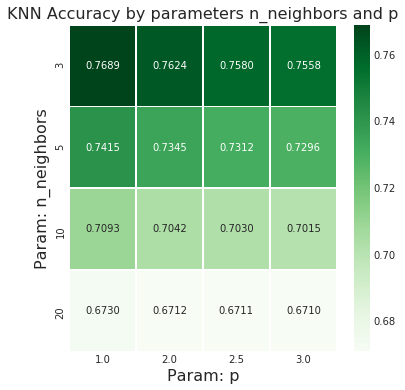

In [129]:
clf_dict = knn_clf_grid
knn_dict = {
    'mean score': clf_dict.cv_results_['mean_test_score'],
    'n_neighbors': clf_dict.cv_results_['param_n_neighbors'],
    'p': clf_dict.cv_results_['param_p']
}
knn_df = pd.DataFrame(knn_dict)
clf_df = knn_df
clf_name = 'KNN'
with plt.style.context('seaborn-whitegrid'):
    fig, ax = plt.subplots(nrows=1, ncols=1, sharex=False, figsize=(6,6))
#     ax = ax.flatten()
    param_heat_mapper(ax, clf_df, 'n_neighbors', 'mean score', 'p', clf_name)
    

Hmm, $0.7688$ isn't very encouraging. Let's scale the data and try again.  

In [22]:
rs = RobustScaler()
cc_train_sm_rs = rs.fit_transform(cc_train_sm)

In [23]:
knn_param = [
                {'n_neighbors': [1,2,3],
                 'p': [1,2]
                }
            ]
knn_clf = KNeighborsClassifier()

In [24]:
knn_clf_grid = GridSearchCV(knn_clf, knn_param, verbose=9, cv=3, n_jobs=-1)

%time knn_clf_grid.fit(cc_train_sm_rs, class_train_sm)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   48.1s
[Parallel(n_jobs=-1)]: Done   6 out of  18 | elapsed:  1.1min remaining:  2.2min
[Parallel(n_jobs=-1)]: Done   9 out of  18 | elapsed:  2.6min remaining:  2.6min
[Parallel(n_jobs=-1)]: Done  12 out of  18 | elapsed:  3.3min remaining:  1.6min
[Parallel(n_jobs=-1)]: Done  15 out of  18 | elapsed:  4.2min remaining:   50.3s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:  4.5min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:  4.5min finished


Wall time: 4min 30s


GridSearchCV(cv=3, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'p': [1, 2], 'n_neighbors': [1, 2, 3]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=9)

In [30]:
print_stats(knn_clf_grid)

Param values that produces the most accurate model: {'p': 1, 'n_neighbors': 1}
Score of the most accurate model: 0.941802 

   --- Mean accuracy (+/- standard deviation) for different C values ---
0.942 (+/- 0.024) for the model with params {'p': 1, 'n_neighbors': 1}
0.933 (+/- 0.016) for the model with params {'p': 2, 'n_neighbors': 1}
0.920 (+/- 0.061) for the model with params {'p': 1, 'n_neighbors': 2}
0.925 (+/- 0.036) for the model with params {'p': 2, 'n_neighbors': 2}
0.932 (+/- 0.035) for the model with params {'p': 1, 'n_neighbors': 3}
0.922 (+/- 0.019) for the model with params {'p': 2, 'n_neighbors': 3}


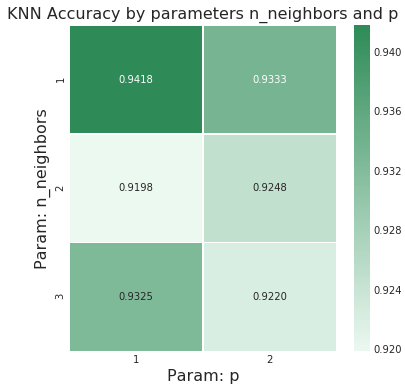

In [29]:
clf_dict = knn_clf_grid
knn_dict = {
    'mean score': clf_dict.cv_results_['mean_test_score'],
    'n_neighbors': clf_dict.cv_results_['param_n_neighbors'],
    'p': clf_dict.cv_results_['param_p']
}
knn_df = pd.DataFrame(knn_dict)
clf_df = knn_df
clf_name = 'KNN'
with plt.style.context('seaborn-whitegrid'):
    fig, ax = plt.subplots(nrows=1, ncols=1, sharex=False, figsize=(6,6))
    param_heat_mapper(ax, clf_df, 'n_neighbors', 'mean score', 'p', clf_name)

Ok, an accuracy of $0.9418$ is significantly more encouraging. Now with those parameters, and with a slight tweak to my evaluator function that will scale the data 

In [56]:
cc_cats.shape
cc_classes.shape
cc_cats_rs.shape

(29601, 87)

In [35]:
cc_cats_rs = pd.DataFrame(rs.fit_transform(cc_cats), columns=cc_cats.columns)
cc_cats_rs.head(5)

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
0,-0.631579,-0.769231,-0.290768,-0.296529,-0.338347,-0.365889,-0.374617,-0.357795,-0.524345,-0.315689,...,1.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.105263,-0.615385,-0.310278,-0.319279,-0.303491,-0.302896,-0.303073,-0.289635,-0.524345,-0.241198,...,0.0,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.263158,0.000000,0.110627,-0.116031,-0.113260,-0.089985,-0.065083,-0.032795,-0.145318,-0.121437,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.473684,0.230769,0.391964,0.449105,0.511665,0.179219,0.225048,0.259787,-0.024969,0.002874,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.473684,1.769231,-0.216214,-0.254101,0.276330,0.037253,0.021846,0.042075,-0.024969,8.305150,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
best_knn_clf = KNeighborsClassifier(p=1, n_neighbors=1, n_jobs=-1)

d_train.shape: (22200, 87)
cls_train.shape: (22200,)
d_test.shape: (7401, 87)
cls_test.shape: (7401,)
d_train_sm.shape: (34490, 87)
cls_train_sm.shape: (34490,)
d_test_sm.shape: (11502, 87)
cls_test_sm.shape: (11502,)
cc_test_sm.shape: (15716, 87)
probas_.shape: (11502, 2)
probas_[:, 1].shape: (11502,)
d_train.shape: (22200, 87)
cls_train.shape: (22200,)
d_test.shape: (7401, 87)
cls_test.shape: (7401,)
d_train_sm.shape: (34378, 87)
cls_train_sm.shape: (34378,)
d_test_sm.shape: (11614, 87)
cls_test_sm.shape: (11614,)
cc_test_sm.shape: (15716, 87)
probas_.shape: (11614, 2)
probas_[:, 1].shape: (11614,)
d_train.shape: (22200, 87)
cls_train.shape: (22200,)
d_test.shape: (7401, 87)
cls_test.shape: (7401,)
d_train_sm.shape: (34518, 87)
cls_train_sm.shape: (34518,)
d_test_sm.shape: (11474, 87)
cls_test_sm.shape: (11474,)
cc_test_sm.shape: (15716, 87)
probas_.shape: (11474, 2)
probas_[:, 1].shape: (11474,)
d_train.shape: (22200, 87)
cls_train.shape: (22200,)
d_test.shape: (7401, 87)
cls_test.s

d_train.shape: (22200, 87)
cls_train.shape: (22200,)
d_test.shape: (7401, 87)
cls_test.shape: (7401,)
d_train_sm.shape: (34408, 87)
cls_train_sm.shape: (34408,)
d_test_sm.shape: (11584, 87)
cls_test_sm.shape: (11584,)
cc_test_sm.shape: (15716, 87)
probas_.shape: (11584, 2)
probas_[:, 1].shape: (11584,)
d_train.shape: (22200, 87)
cls_train.shape: (22200,)
d_test.shape: (7401, 87)
cls_test.shape: (7401,)
d_train_sm.shape: (34444, 87)
cls_train_sm.shape: (34444,)
d_test_sm.shape: (11548, 87)
cls_test_sm.shape: (11548,)
cc_test_sm.shape: (15716, 87)
probas_.shape: (11548, 2)
probas_[:, 1].shape: (11548,)
d_train.shape: (22200, 87)
cls_train.shape: (22200,)
d_test.shape: (7401, 87)
cls_test.shape: (7401,)
d_train_sm.shape: (34542, 87)
cls_train_sm.shape: (34542,)
d_test_sm.shape: (11450, 87)
cls_test_sm.shape: (11450,)
cc_test_sm.shape: (15716, 87)
probas_.shape: (11450, 2)
probas_[:, 1].shape: (11450,)


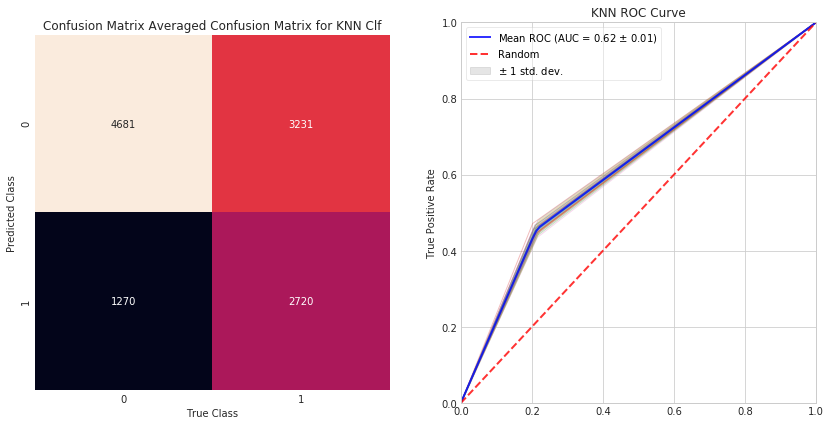

In [57]:
evaluator(best_knn_clf, cc_cats_rs, cc_classes, 'KNN', 6, debugger=True)

Note: Hmm, I turned on the 'debugging mode' I coded into the method, but it appears that clearing all variables took care of the error I was getting. That took about 20 minutes to run, so I'm not going to run it again.

### KNN Analysis: 

Hmm, this produced an accuracy far below what I was expecting from my preliminary run, although that was performed only with 3 folds on about $\frac{2}{3}$ of the data (although it was enlarged via SMOTE). Also, the order of SMOTE and scaling was altered. Time permitting, I  might investigate the effect of using an undersampling balancing technique like **Tomek** coupled with SMOTE$^{bib1}$.

## Random Forest:



In [60]:
(2720+4681)/(2720+4681+3231+1270)

0.6218282641572845

In [61]:


def param_heat_mapper(ax_, df_, ind_col, val_col, col_col, base_clfname):
    logit_piv = df_.pivot(index=ind_col, values=val_col, columns=col_col)
    title_ = base_clfname + ' Accuracy by parameters ' + ind_col + ' and ' + col_col
    with plt.style.context('seaborn-whitegrid'):
#         fig, ax = plt.subplots(nrows=1, sharex=False, figsize=(9,7))
        sns.heatmap(logit_piv, linewidths=0.5, annot=True, fmt='0.4f', ax=ax_, cmap=g_cmap)
        ax_.set_title(title_, fontsize=16)
        ax_.set_xlabel('Param: ' + col_col, fontsize=16)
        ax_.set_ylabel('Param: ' + ind_col, fontsize=16)

In [52]:
# help(pickle)
# help(open)
# ax1 = plt.axes()
# help(ax1.xaxis.set_major_locator(plt.MultipleLocator))
# help(plt.MultipleLocator)
# help(plt.LinearLocator)
# help(np.arange)
# help(ax1.xaxis)
# help(sns.countplot)
# help(pd.get_dummies)
# help(fancyimpute)
# help(LogisticRegression)
help(np.empty)





Fitting 3 folds for each of 16 candidates, totalling 48 fits
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   24.1s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  39 out of  48 | elapsed:  3.4min remaining:   46.8s
[Parallel(n_jobs=-1)]: Done  45 out of  48 | elapsed:  4.5min remaining:   18.0s
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:  4.6min finished
Wall time: 4min 38s
GridSearchCV(cv=3, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'n_neighbors': [3, 5, 10, 20], 'p': [1, 2, 2.5, 3]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=9)



























































# Bibliography


[bib1] Gustavo E. A. P. A. Batista, Ronaldo C. Prati, and Maria Carolina Monard. "A study of the behavior of several methods for balancing machine learning training data." ACM SIGKDD Explorations Newsletter 6, no. 1 (2004): 20-29. doi:10.1145/1007730.1007735.